In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import tensorflow as tf
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.callbacks import TensorBoard
import time

In [2]:
#locate Dataset
DATADIR = "C:/Users/ranji/Covid Detection/CovidDatasetUpdated/Train"
CATEGORIES = ["Covid", "Normal"]

NAME = "Covid-Mode_new-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

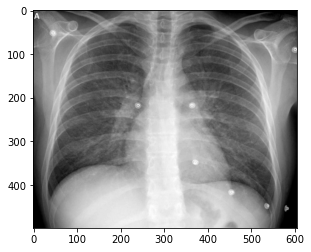

In [3]:
for categoty in CATEGORIES:
    path = os.path.join(DATADIR, categoty)  # path to dog or cat
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break
        


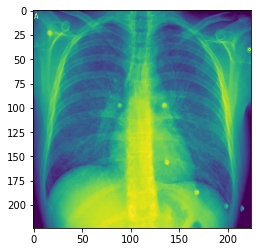

In [4]:
IMG_SIZE = 224
NEW_ARRAY = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(NEW_ARRAY)
plt.show()


In [5]:
# Data Augmentation
train_datagen = image.ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [6]:
train_generator = train_datagen.flow_from_directory(
    DATADIR,
    target_size = (224,224),
    batch_size = 32,
    class_mode ='binary'
)

Found 4551 images belonging to 2 classes.


In [7]:
# Output classes
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [9]:
validation_generator = test_dataset.flow_from_directory(
    'C:/Users/ranji/Covid Detection/CovidDatasetUpdated/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode ='binary'
)

Found 60 images belonging to 2 classes.


In [10]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [38]:
# Model Structure
model = Sequential()

model.add(Conv2D( 32, kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D( 64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D( 64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D( 128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D( 256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D( 128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D( 256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#added one more layer
#model.add(Conv2D( 128,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])


In [39]:
# Train the model
model.fit(train_generator,steps_per_epoch = int(4551/32),epochs=50,validation_data= validation_generator, validation_steps=int(60/32))
#model.fit(train_generator,steps_per_epoch = int(640/32),epochs=50,validation_data= validation_generator, validation_steps=int(60/32), callbacks=[tensorboard])

Epoch 1/50
142/142 [==============================] - 314s 2s/step - loss: 0.5649 - accuracy: 0.7340 - val_loss: 0.4988 - val_accuracy: 0.8438
Epoch 2/50
142/142 [==============================] - 319s 2s/step - loss: 0.2688 - accuracy: 0.8975 - val_loss: 0.0927 - val_accuracy: 0.9688
Epoch 3/50
142/142 [==============================] - 319s 2s/step - loss: 0.1896 - accuracy: 0.9349 - val_loss: 0.0839 - val_accuracy: 1.0000
Epoch 4/50
142/142 [==============================] - 314s 2s/step - loss: 0.1312 - accuracy: 0.9597 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 5/50
142/142 [==============================] - 328s 2s/step - loss: 0.1237 - accuracy: 0.9617 - val_loss: 0.0374 - val_accuracy: 1.0000
Epoch 6/50
142/142 [==============================] - 332s 2s/step - loss: 0.1081 - accuracy: 0.9633 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 7/50
142/142 [==============================] - 327s 2s/step - loss: 0.0892 - accuracy: 0.9708 - val_loss: 0.0153 - val_accuracy: 1.0000

In [40]:
model.save("optimizedCovidModel.model")

INFO:tensorflow:Assets written to: 20_ConvMode_new.model\assets


In [41]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_175 (Conv2D)          (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_141 (MaxPoolin (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_141 (Dropout)        (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_142 (MaxPoolin (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_142 (Dropout)        (None, 54, 54, 64)      

In [ ]:
print("Num of GPUs available", len(tf.config.experimental.list_physical_devices("GPU")))


In [ ]:
tf.test.is_built_with_cuda()